## Classes

# kod 

In [1]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [94]:
#importowanie csv do ramki danych
#passengers = pd.read_csv('train_and_test2.csv')
#passengers.head()
#data = pd.read_csv('cardio_train_comma.csv')
data = pd.read_csv('college.csv')
data.head()


,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [95]:
# analiza danych statystycznych
print(data.describe())
print(data.info())
print(data.isnull().values.any())

        parent_age  parent_salary   house_area  average_grades
count  1000.000000   1.000000e+03  1000.000000     1000.000000
mean     52.208000   5.381570e+06    74.515300       86.097200
std       3.500427   1.397546e+06    15.293346        3.378738
min      40.000000   1.000000e+06    20.000000       75.000000
25%      50.000000   4.360000e+06    64.600000       83.737500
50%      52.000000   5.440000e+06    75.500000       85.575000
75%      54.000000   6.382500e+06    84.825000       88.262500
max      65.000000   1.000000e+07   120.000000       98.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence 

In [96]:
#2. usuwanie nieprzydatnych danych
# data.drop(['oldpeak'], axis=1, inplace = True)
# data.drop(['slp'], axis=1, inplace = True)
def setTypeSchool(field):
    if field == 'Academic':
        return 1
    if field == 'Vocational':
        return 0
    return field

def setSchoolAccreditation(field):
    if field == 'A':
        return 1
    if field == 'B':
        return 0
    return field

def setGender(field):
    if field == 'Male':
        return 1
    if field == 'Female':
        return 0
    return field

def setInterest(field):
    if field == 'Very Interested':
        return 4
    if field == 'Quiet Interested':
        return 3
    if field == 'Less Interested':
        return 2
    if field == 'Uncertain':
        return 1
    if field == 'Not Interested':
        return 0
    
    return field

def setResidence(field):
    if field == 'Urban':
        return 1
    if field == 'Rural':
        return 0
    return field

def changeDataToNumbers(x):
    if x.name == 'type_school':
        x = x.apply(lambda y: setTypeSchool(y))
        
    if x.name == 'school_accreditation':
        x = x.apply(lambda y: setSchoolAccreditation(y))
        
    if x.name == 'gender':
        x = x.apply(lambda y: setGender(y))
        
    if x.name == 'interest':
        x = x.apply(lambda y: setInterest(y))
        
    if x.name == 'residence':
        x = x.apply(lambda y: setResidence(y))
        
    return x

# data = data.apply(lambda x: setTarget(x))
data = data.apply(lambda x: changeDataToNumbers(x))
data

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,1,1,1,2,1,56,6950000,83.0,84.09,False,True
1,1,1,1,2,1,57,4410000,76.8,86.91,False,True
2,1,0,0,4,1,50,6500000,80.6,87.43,False,True
3,0,0,1,4,0,49,6600000,78.2,82.12,True,True
4,1,1,0,4,1,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,4,0,49,7420000,63.6,85.99,True,True
996,1,0,0,2,0,51,7480000,84.3,89.72,True,True
997,0,1,1,2,1,49,5550000,75.2,79.56,False,True
998,1,0,1,1,0,53,5840000,105.8,87.18,True,True


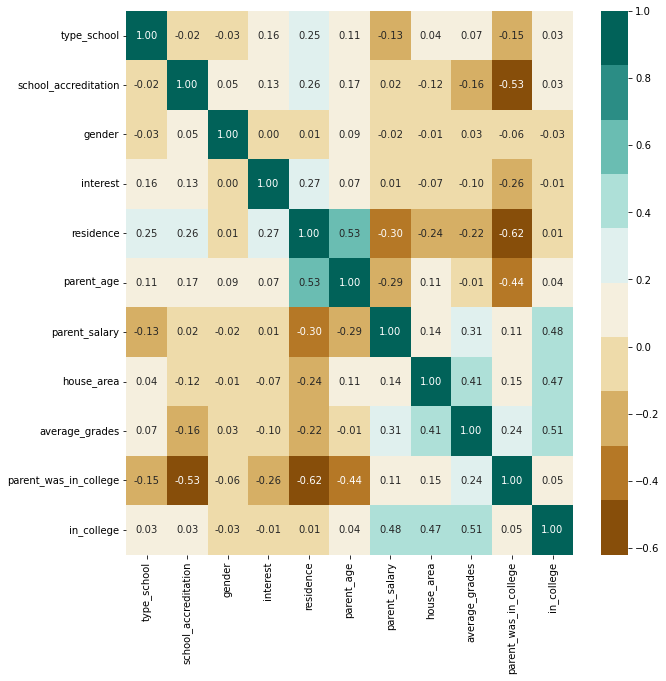

In [97]:
# wyznaczenie macierzy korelacji

correlations = data.corr()

fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(data.columns)

plt.show()


In [98]:
# uzupełnienie pustych wartości
data = data.sample(frac=1).reset_index(drop=True)
data.fillna(data.mean(), inplace=True)
dataCopy = data.copy()
data

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,0,0,1,1,0,48,5280000,78.8,82.24,True,False
1,0,0,0,0,0,45,7490000,60.0,87.25,True,True
2,0,1,1,4,1,59,3800000,66.6,82.98,False,False
3,1,0,1,1,1,60,2650000,84.1,86.61,True,False
4,1,1,1,0,0,41,3020000,50.6,77.18,True,False
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,57,4500000,50.7,80.55,False,True
996,0,0,0,4,0,51,6180000,74.0,83.96,True,False
997,1,0,0,3,1,52,4680000,40.8,82.88,False,False
998,1,1,1,2,1,53,2570000,100.0,91.43,False,True


In [99]:

dataB = data.sort_values('in_college', ascending=False)
# df = dataB.loc[data['is_safe'] == 1, 'bacteria']
# df
dataB

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
999,1,1,0,3,1,49,7450000,92.6,83.55,False,True
404,0,1,1,2,1,51,7040000,57.6,87.37,True,True
398,0,1,1,4,1,55,4740000,97.1,90.49,False,True
801,1,0,0,4,0,49,7460000,78.0,87.39,False,True
400,1,0,0,4,0,49,7790000,80.2,87.53,True,True
...,...,...,...,...,...,...,...,...,...,...,...
458,1,1,0,2,1,52,4450000,42.2,81.83,False,False
462,0,0,1,0,0,52,4170000,90.4,84.21,True,False
463,0,1,0,1,0,54,4900000,81.4,86.47,True,False
464,1,0,0,2,1,47,3950000,50.8,82.67,True,False


In [100]:
# zbiór danych
#data['age'] = data['age'] / 365
X = data.drop('in_college', axis=1).to_numpy()
X

array([[0, 0, 1, ..., 78.8, 82.24, True],
       [0, 0, 0, ..., 60.0, 87.25, True],
       [0, 1, 1, ..., 66.6, 82.98, False],
       ...,
       [1, 0, 0, ..., 40.8, 82.88, False],
       [1, 1, 1, ..., 100.0, 91.43, False],
       [1, 1, 0, ..., 92.6, 83.55, False]], dtype=object)

In [101]:
# zbiór etykiet
y = data.loc[:, 'in_college'].to_numpy()
y

array([False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False, False,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False,  True,  True, False,  True,
        True, False,  True, False,  True, False, False,  True, False,
        True,  True, False, False, False,  True, False,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True,  True,

In [102]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [103]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    with open('brain.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, y_test))
    return score_vals

In [104]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.0, 0.0, 0.0, 0.495]


H:\Programy\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.6732673267326733, 0.7472527472527473, 0.7083333333333334, 0.72]


In [106]:
# MODEL 3 - Random Forest Tree 
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, y_train, X_test)
accuracy_compare['RF'] =  accuracy
print ("RF: ", accuracy)

RF:  [0.9108910891089109, 0.8440366972477065, 0.8761904761904762, 0.87]


<AxesSubplot:>

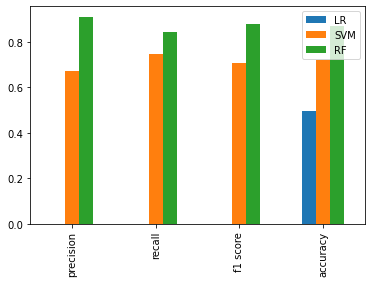

In [107]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')

In [ ]:
# działania korygujące - zastosowanie sieci neuronowej

# MODEL 4 - neural network
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=5000)
# accuracy = train_model(mlp, X_train, y_train, X_test)
# accuracy_compare['neural network'] = accuracy
# print ("neural network" , accuracy)

In [ ]:
# działania korygujące - hiperparametry

# MODEL 5 - Support Vector Machine
# accuracy = train_model(svm.SVC(gamma='auto'), X_train, y_train, X_test)
# accuracy_compare['SVM'] = accuracy
# print ("SVM gamma='auto'" , accuracy)

# # MODEL 6 - Support Vector Machine
# accuracy = train_model(svm.SVC(kernel='sigmoid'), X_train, y_train, X_test)
# accuracy_compare['SVM'] = accuracy
# print ("SVM kernel='sigmoid'" , accuracy)

# # MODEL 7 - Support Vector Machine
# accuracy = train_model(svm.SVC(degree=4), X_train, y_train, X_test)
# accuracy_compare['SVM'] = accuracy
# print ("SVM degree=4" , accuracy)

In [108]:
with open('brain.pickle', 'rb') as handle:
    clf = pickle.load(handle)

clf.predict([
        [1,0,0,1,0,49,4790000,80.2,67.53,True]
    ]) 

array([ True])